In [1]:
pwd

'C:\\Users\\Admin\\Desktop\\ImageProcess'

In [6]:
import tensorflow as tf


In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
pip list

Package                            Version            
---------------------------------- -------------------
absl-py                            0.9.0              
alabaster                          0.7.12             
anaconda-client                    1.7.2              
anaconda-navigator                 1.9.7              
anaconda-project                   0.8.3              
asn1crypto                         1.2.0              
astor                              0.8.1              
astroid                            2.3.3              
astropy                            4.0                
atomicwrites                       1.3.0              
attrs                              19.3.0             
Babel                              2.8.0              
backcall                           0.1.0              
backports.functools-lru-cache      1.6.1              
backports.os                       0.1.1              
backports.shutil-get-terminal-size 1.0.0              
backports.

In [72]:
%matplotlib inline
from IPython.display import display,Math,Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img=Image.open('dataset/low4.jpg')

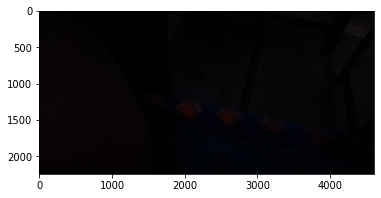

In [73]:
plt.imshow(img,cmap='gray')

In [74]:
#converting my image into numpy array

img=np.asarray(img)

(array([3.567995e+06, 4.113829e+06, 3.501487e+06, 3.251745e+06,
        0.000000e+00, 3.285491e+06, 3.142482e+06, 2.794921e+06,
        2.288531e+06, 0.000000e+00, 1.732265e+06, 1.266634e+06,
        7.720170e+05, 0.000000e+00, 4.701720e+05, 2.482650e+05,
        1.361870e+05, 1.033350e+05, 0.000000e+00, 6.734600e+04,
        5.080500e+04, 3.826800e+04, 0.000000e+00, 2.939600e+04,
        2.279200e+04, 1.719600e+04, 1.270400e+04, 0.000000e+00,
        9.025000e+03, 6.679000e+03, 5.271000e+03, 0.000000e+00,
        4.885000e+03, 4.655000e+03, 4.363000e+03, 3.978000e+03,
        0.000000e+00, 3.594000e+03, 3.592000e+03, 2.847000e+03,
        0.000000e+00, 1.790000e+03, 8.260000e+02, 2.850000e+02,
        7.700000e+01, 0.000000e+00, 2.600000e+01, 2.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([ 0.  ,  0.78,  1.56,  2.34,  3.12,  3.9 ,  4.68,  5.46,  6.24,
         7.02,  7.8 ,  8.58,  9.36, 10.14, 10.92, 11.7 , 12.48, 13.26,
        14.04, 14.82, 15.6 , 16.38, 17.16, 17.94, 18

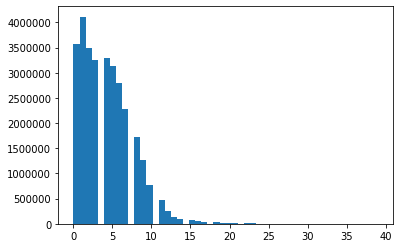

In [75]:
#flattening image pixels
flat=img.flatten()

#showing histogram
plt.hist(flat,bins =50)

In [76]:
#histogram equalisation function

display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

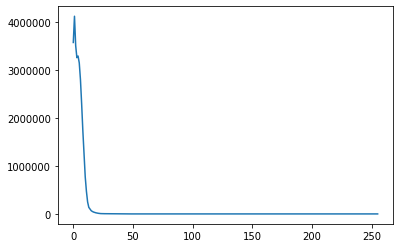

In [77]:
def get_histogram(image,bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel]+=1
    return histogram
hist = get_histogram(flat,256)
plt.plot(hist)

<IPython.core.display.Math object>

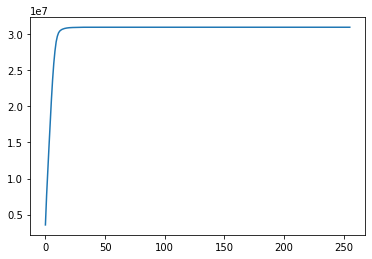

In [78]:
def cumsum(a):
    a=iter(a)
    b=[next(a)]
    for i in a:
        b.append(b[-1]+i)
    return np.array(b)

cs = cumsum(hist)
plt.plot(cs)

display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

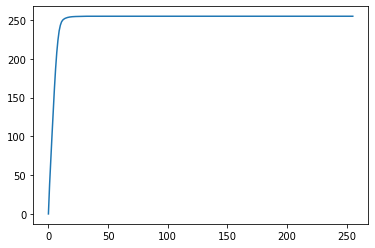

In [79]:
#normalizing between 0-255

nj=(cs-cs.min())*255
N=cs.max()-cs.min()

cs = nj/N
plt.plot(cs)

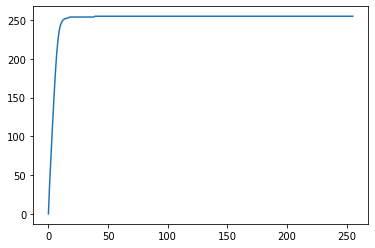

In [80]:
cs=cs.astype('uint8')
plt.plot(cs)

(array([3567995.,       0.,       0.,       0.,       0.,       0.,
              0., 4113829.,       0.,       0.,       0.,       0.,
              0., 3501487.,       0.,       0.,       0.,       0.,
              0., 3251745.,       0.,       0.,       0.,       0.,
              0., 3285491.,       0.,       0.,       0.,       0.,
              0., 3142482.,       0.,       0.,       0.,       0.,
        2794921.,       0.,       0.,       0., 2288531.,       0.,
              0., 1732265.,       0.,       0., 1266634.,  772017.,
         470172.,  778191.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <a list of 50 Patc

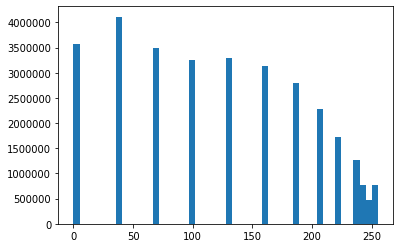

In [81]:
img_new = cs[flat]
plt.hist(img_new,bins=50)

In [82]:
img_new = np.reshape(img_new,img.shape)
img_new

array([[[224, 101, 208],
        [236, 131, 224],
        [236, 131, 224],
        ...,
        [160, 160, 208],
        [186, 186, 224],
        [224, 224, 243]],

       [[236, 131, 224],
        [236, 131, 224],
        [236, 131, 224],
        ...,
        [101, 101, 160],
        [131, 131, 186],
        [186, 186, 224]],

       [[243, 160, 236],
        [208,  70, 186],
        [208,  70, 186],
        ...,
        [131, 131, 186],
        [160, 160, 208],
        [186, 186, 224]],

       ...,

       [[243,   0, 224],
        [224,  38, 224],
        [236,  70, 236],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[247,  38, 236],
        [243,   0, 224],
        [236,  70, 236],
        ...,
        [ 38,  38,  38],
        [ 38,  38,  38],
        [ 38,  38,  38]],

       [[252, 131, 250],
        [247,  38, 236],
        [243, 101, 243],
        ...,
        [ 38,  38,  38],
        [ 38,  38,  38],
        [ 38,  38,  38]]

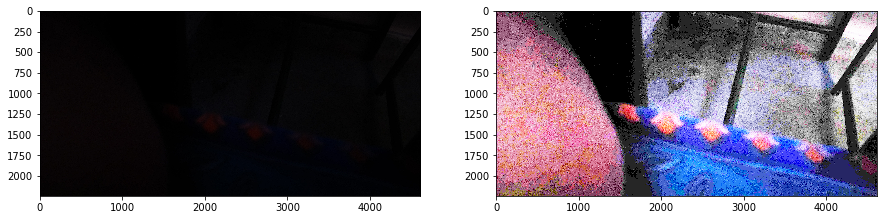

In [83]:
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img,cmap='gray')

#new image display

fig.add_subplot(1,2,2)
plt.imshow(img_new,cmap='gray')

plt.show(block=True)

In [84]:
newimg= Image.fromarray(img_new,'RGB')
newimg.save('dataset/low4enhanced.jpg')
newimg.show()